<a href="https://colab.research.google.com/github/srinivasanibmbangalore/Deep-Learning2/blob/Version-1/FFNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

# new libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles

In [2]:

nn_architecture = [
    {"input_dim": 2, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 6, "activation": "relu"},
    {"input_dim": 6, "output_dim": 4, "activation": "relu"},
    {"input_dim": 4, "output_dim": 1, "activation": "sigmoid"},
]
type(nn_architecture)


list

In [0]:
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    print("Number of layers is "+ str(number_of_layers))
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    return params_values

In [4]:
params_values=init_layers(nn_architecture)
print(params_values['W1'].shape)

Number of layers is 5
(4, 2)


In [0]:
class FFSNNetwork:
    def __init__(self, n_inputs, n_outputs,hidden_sizes = [2]):
        # no. of inputs
        self.nx = n_inputs
        
        # no. of outputs
        self.ny = n_outputs
        
        # no. of hidden layer
        self.nh = len(hidden_sizes)
        print("hiddensize="+str(hidden_sizes))
        print("nh="+str(self.nh))
        
        # total number of parameters required from L[0] to L[nh+1]
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        
        # weights and biases in the form of dictionaries
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            # W[i+1] will have a size = (no. of elements in current layer =) rows and (no. of elemetns in next layer =) cols
            #print("i="+str(i))
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])####Note: Number of Rows->Number of nodes bottom layer and columns = number of nodes in the current hidden layers
            print(self.W[i+1].shape)
            #print(self.W[i+1])
            
            # Similarly, B[i+1] will have a size = 1 row and (no. of elements in next layer =) cols
            self.B[i+1] = np.zeros((1, self.sizes[i+1])) ####Note: Number of Rows->1 and columns = number of nodes in the current hidden layers
            print("@@@@")
            print(self.B[i+1].shape)
            #print(self.B[i+1])
            print("@@@@")

        print(n_inputs)
        print(self.nh)
        print(self.sizes)

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def softmax(self, x):
       exps = np.exp(x)
       return exps / np.sum(exps)
    
    def forward_pass(self, x):
      self.A = {}
      self.H = {}
      self.H[0] = x.reshape(1, -1)
      for i in range(self.nh):
        self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]  #Note it is not a dot product. Rather it is a matrix multiplication
        self.H[i+1] = self.sigmoid(self.A[i+1])
      self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
      self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
      return self.H[self.nh+1]
    
    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl
 
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1])) 

    def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
        if display_loss:
            loss = {}
      
        if initialize:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        
        for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
                  
            m = X.shape[1]
            for i in range(self.nh+1):
              self.W[i+1] -= learning_rate * (dW[i+1]/m)
              self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
        if display_loss:
            Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
        if display_loss:
          plt.plot(loss.values())
          plt.xlabel('Epochs')
          plt.ylabel('CE')
          plt.show()
    

In [20]:
ffsnn = FFSNNetwork(8, 3,[5, 6,7,8])
x=np.random.randn(1,8)
print("x=====")
print(x)
print(x.shape)
print("## Sigmoid###")
sgm=ffsnn.sigmoid(x)
print(sgm.shape)
print(sgm)
print("## softmax ###")
sft=ffsnn.softmax(x)
print(sft.shape)
print(sft)
print("## exp ###")
print(np.exp(x)/np.sum(np.exp(x)))
a1=x.reshape(1,-1)
print(a1.shape)
print(a1)
a6=ffsnn.forward_pass(x)
print(a6)
print(a6.shape)
print(a6.ndim)

hiddensize=[5, 6, 7, 8]
nh=4
(8, 5)
@@@@
(1, 5)
@@@@
(5, 6)
@@@@
(1, 6)
@@@@
(6, 7)
@@@@
(1, 7)
@@@@
(7, 8)
@@@@
(1, 8)
@@@@
(8, 3)
@@@@
(1, 3)
@@@@
8
4
[8, 5, 6, 7, 8, 3]
x=====
[[-1.6193842  -0.53007724 -0.44004805  0.47207031  0.8183574  -0.72893785
  -1.48285076  0.46105579]]
(1, 8)
## Sigmoid###
(1, 8)
[[0.16528981 0.37049887 0.39172952 0.61587365 0.69388755 0.32542785
  0.18499722 0.61326461]]
## softmax ###
(1, 8)
[[0.02606966 0.07748458 0.08478411 0.21107775 0.2984235  0.06351133
  0.02988347 0.20876559]]
## exp ###
[[0.02606966 0.07748458 0.08478411 0.21107775 0.2984235  0.06351133
  0.02988347 0.20876559]]
(1, 8)
[[-1.6193842  -0.53007724 -0.44004805  0.47207031  0.8183574  -0.72893785
  -1.48285076  0.46105579]]
[[0.04764136 0.47154483 0.48081381]]
(1, 3)
2


In [21]:

data, labels = make_blobs(n_samples = 2000, centers = 5, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(2000, 2) (2000,)


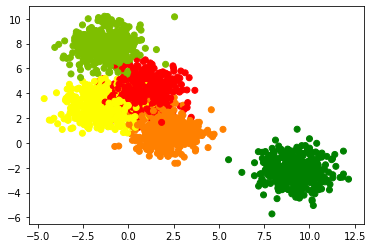

In [22]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
# scatter(x axis as feature 0, y axis as feature 1)
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

### if we want binary classification

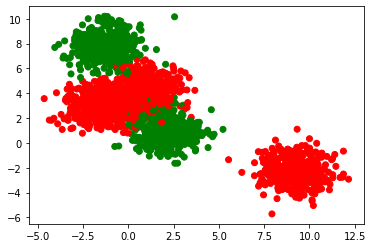

In [23]:
labels_orig = labels
labels_new = np.mod(labels_orig, 2)
plt.scatter(data[:,0], data[:,1], c = labels_new, cmap = my_cmap)
plt.show()

The make_moons() function is for binary classification and will generate a swirl pattern, or two moons.
You can control how noisy the moon shapes are and the number of samples to generate.
This test problem is suitable for algorithms that are capable of learning nonlinear class boundaries.

(2000, 2) (2000,)


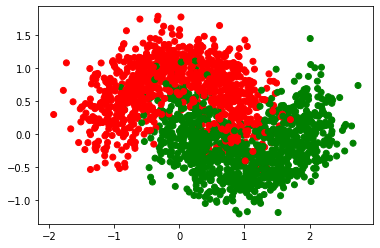

In [24]:
moon_data, moon_labels = make_moons(noise=0.3, random_state=0, n_samples=2000)
print(data.shape, labels.shape)
plt.scatter(moon_data[:,0], moon_data[:,1], c = moon_labels, cmap = my_cmap)
plt.show()

(2000, 2) (2000,)


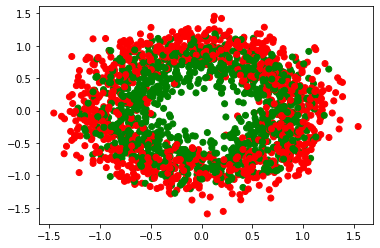

In [25]:
circle_data, circle_labels = make_circles(noise=0.2, random_state=0, n_samples=2000)
print(circle_data.shape, circle_labels.shape)
plt.scatter(circle_data[:,0], circle_data[:,1], c = moon_labels, cmap = my_cmap )
plt.show() 

In [26]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state = 0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(1500, 2) (500, 2) (2000,)


In [27]:
enc = OneHotEncoder()
y_OH_train = enc.fit_transform(np.expand_dims(Y_train, 1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val, 1)).toarray()
print(y_OH_train)
print(y_OH_train.shape, y_OH_val.shape)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
(1500, 5) (500, 5)


In [28]:
ffsn_multi = FFSNNetwork(2,4,[2,3])
ffsn_multi.fit(X_train, y_OH_train, epochs=2000, learning_rate=0.005, display_loss=True)
Y_pred_train = ffsn_multi.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train, 1)

Y_pred_val = ffsn_multi.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val, 1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

hiddensize=[2, 3]
nh=2
(2, 2)
@@@@
(1, 2)
@@@@
(2, 3)
@@@@
(1, 3)
@@@@
(3, 4)
@@@@
(1, 4)
@@@@
2
2
[2, 2, 3, 4]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


ValueError: ignored